# **Tugas Besar Pembelajaran Mesin (Classification)**

Kelas : IF-43-12

Anggota : 
- Raihan Romzi Rakhman (1301194376)
- Haydar Rizaldy Putera Prayudi (1301194388)

### **Task:**

1.   **Formulasi Masalah** → jelaskan apa permasalahan yang akan diselesaikan.

2.   **Eksplorasi dan Persiapan Data** (termasuk data splitting) →	lakukan semua teknik eksplorasi dan persiapan data yang menurut Anda perlu dilakukan. Jelaskan
mengapa perlu melakukan teknik tersebut, dan lakukan analisis terhadap hasilnya.

3.   **Pemodelan** → bangunlah model menggunakan data hasil praproses 2.b, dan  lakukan proses training untuk mendapatkan hasil terbaik. Jelaskan secara detail semua proses yang Anda lakukan dilengkapi dengan justifikasi dan analisis hasilnya.

4.   **Evaluasi** → pilih metode evaluasi yang sesuai beserta justifikasinya.  Lakukan evaluasi terhadap model yang telah dihasilkan. Berikan analisis  terhadap hasil evaluasi.

5.   **Eksperimen** → lakukan berbagai eksperimen yang melibatkan tahapan Eksplorasi dan Persiapan Data, Pemodelan, dan Evaluasi untuk mendapatkan hasil terbaik. Laporkan semua Eksperimen yang Anda lakukan beserta analisis hasil dan
perbandingannya.

6.   **Kesimpulan** → berikan kesimpulan dari semua proses yang dijalankan beserta hasil akhir dari berbagai eksperimen yang telah dilakukan.

<br><br>













## **Import Library**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<br><br>

## **Import Dataset**

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/raihanromzi/Python.Classification_ML/main/Datasets/kendaraan_clean.csv")
df.sample(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
25510,1.0,0.153846,1.0,0.288462,1.0,0.5,1.0,0.000000,0.932099,0.470588,0
138379,0.0,0.076923,1.0,0.153846,1.0,0.5,1.0,0.521073,0.925926,0.325260,0
143151,1.0,0.061538,1.0,0.538462,1.0,0.5,1.0,0.427913,0.932099,0.498270,0
122442,1.0,0.061538,1.0,0.711538,0.0,0.5,0.0,0.575719,0.932099,0.173010,0
40197,0.0,0.046154,1.0,0.692308,1.0,0.5,1.0,0.450666,0.932099,0.377163,0
124952,1.0,0.046154,1.0,0.230769,1.0,0.5,1.0,0.581074,0.925926,0.276817,0
178392,1.0,0.430769,1.0,0.884615,0.0,1.0,0.0,0.000000,0.956790,0.159170,0
146299,1.0,0.123077,1.0,0.788462,1.0,0.5,1.0,0.518235,0.932099,0.110727,0
70255,0.0,0.015385,1.0,0.115385,0.0,0.5,0.0,0.332776,0.932099,0.740484,1
185135,1.0,0.015385,1.0,0.750000,0.0,0.5,0.0,0.557138,0.981481,0.761246,0


<br><br>

## **Feature & Target**

In [85]:
# Memisahkan antara data yang dijadikan Feature dan Target
data = ['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan']
target = ['Tertarik']

X = df[data]
Y = df[target]

<br><br>

## **Splitting Dataset**

Reference : 
- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
- https://towardsdatascience.com/intro-to-feature-selection-methods-for-data-science-4cae2178a00a

In [119]:
# Memisahkan Dataset menjadi Training dan Test, data yang digunakan untuk test adalah 20% dari keseluruhan data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [87]:
X_train.head(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
53927,0.0,0.123077,1.0,0.692308,1.0,0.5,1.0,0.000000,0.932099,0.865052
46766,0.0,0.030769,1.0,0.230769,1.0,0.5,1.0,0.373756,0.932099,0.460208
72577,1.0,0.000000,1.0,0.961538,1.0,0.5,1.0,0.652714,0.981481,0.826990
47490,1.0,0.046154,1.0,0.884615,1.0,0.5,1.0,0.425041,0.932099,0.252595
99737,1.0,0.092308,1.0,0.788462,1.0,0.5,1.0,0.512272,0.932099,0.975779


In [88]:
Y_train.head(5)

,Tertarik
53927,0
46766,0
72577,0
47490,0
99737,0


<br><br>

## **Feature Selection**

Reference : 
- https://towardsdatascience.com/intro-to-feature-selection-methods-for-data-science-4cae2178a00a
- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


<br>

### **Filtering Method (Pearson Correlation)**

Seperti namanya, dalam metode ini, memfilter dan hanya mengambil sebagian dari fitur yang relevan. Model dibangun setelah memilih fitur. Penyaringan di sini dilakukan dengan menggunakan **correlation matrix** dan **Pearson correlation**.

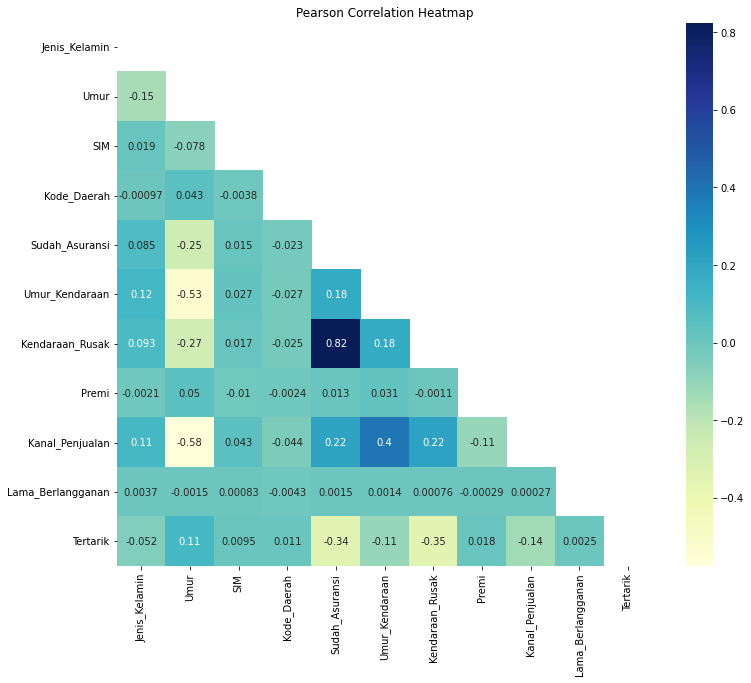

In [89]:
# Heatmap untuk melihat Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool))
heatmap = sns.heatmap(cor, mask=mask, annot=True, cmap="YlGnBu")
heatmap.set_title('Pearson Correlation Heatmap')
plt.show()

In [90]:
# Korelasi tiap fitur data dengan target yaitu "Tertarik"
cor_target = abs(cor["Tertarik"])
print(cor_target)

Jenis_Kelamin        0.052210
Umur                 0.109327
SIM                  0.009532
Kode_Daerah          0.011039
Sudah_Asuransi       0.340889
Umur_Kendaraan       0.108770
Kendaraan_Rusak      0.353636
Premi                0.018467
Kanal_Penjualan      0.137933
Lama_Berlangganan    0.002453
Tertarik             1.000000
Name: Tertarik, dtype: float64


In [91]:
# Memilih nilai korelasi tertinggi
relevant_features = cor_target[cor_target>0.3]
relevant_features.sort_values(ascending=False)

Tertarik           1.000000
Kendaraan_Rusak    0.353636
Sudah_Asuransi     0.340889
Name: Tertarik, dtype: float64

In [92]:
selected_feature = ["Sudah_Asuransi","Kendaraan_Rusak"]
X_train_PCorr = X_train[selected_feature]
X_test_PCorr = X_test[selected_feature]

#### **Kesimpulan Filter Method (Pearson Correlation)** : 
Dengan menggunakanmetode ini, didapatkan 2 data yang memiliki korelasi tinggi, namun hasilnya tidaklah akurat sebab nilai negatif dianggap positif pada saat memilih nilai korelasi tertinggi.

<br>

### **Filtering Method (Analysis of Variance (ANOVA))**

In [93]:
from sklearn.feature_selection import f_classif, f_regression

#### **F-Test**

In [94]:
# Membuat Array 2 Dimensi, Dimensi 1 berisi F-Socre, Dimensi 2 berisi P Value
selected = f_classif(X_train, Y_train)
selected

(array([4.76661033e+02, 2.05827179e+03, 1.65303769e+01, 1.94035249e+01,
        2.24127663e+04, 2.03684923e+03, 2.43982607e+04, 4.47099652e+01,
        3.17246494e+03, 2.82376099e+00]),
 array([1.59082291e-105, 0.00000000e+000, 4.78983848e-005, 1.05876053e-005,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.29193241e-011,
        0.00000000e+000, 9.28803783e-002]))

In [95]:
# Mengambil nilai P Value dari perhitungan dengan f_classif, lalu selanjutnya mengurutkan dari yang terkecil
p_values = pd.Series(selected[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=True, inplace=True)

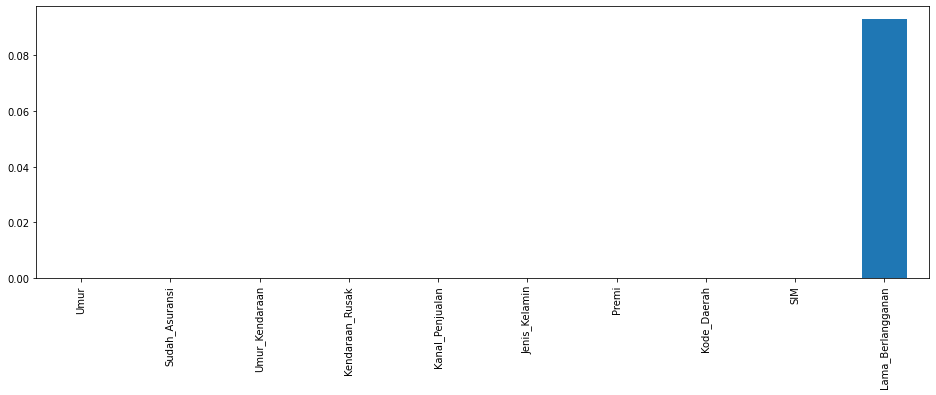

In [96]:
# Membuat visualisasi P Value
p_values.plot.bar(figsize = (16,5))

In [97]:
# Menyeleksi P Value yang memiliki nilai lebih kecil dari 0.05. Yang mana jika memiliki nilai dibawah 0.05 maka fitur tersebut sangat penting.
p_values = p_values[p_values<0.05]
p_values

Umur                0.000000e+00
Sudah_Asuransi      0.000000e+00
Umur_Kendaraan      0.000000e+00
Kendaraan_Rusak     0.000000e+00
Kanal_Penjualan     0.000000e+00
Jenis_Kelamin      1.590823e-105
Premi               2.291932e-11
Kode_Daerah         1.058761e-05
SIM                 4.789838e-05
dtype: float64

In [98]:
# Maka fitur index ke 0-8 adalah fitur-fitur yang penting.
p_values.index

Index(['Umur', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak',
       'Kanal_Penjualan', 'Jenis_Kelamin', 'Premi', 'Kode_Daerah', 'SIM'],
      dtype='object')

In [99]:
# Buat Variable baru untuk menampung dataset X_train dan X_test yang berisi index-index fitur yang penting.
X_train_ANOVA = X_train[p_values.index]
X_test_ANOVA = X_test[p_values.index]

#### **Kesimpulan Filtering Method (Analysis of Variance (ANOVA))** : 
Dengan menggunakan metode ini, didapatkan 8 fitur penting yaitu **Jenis_Kelamin, Umur, SIM, Kode_Daerah, Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak, Premi, Kanal_Penjualan**

<br>

### **Wrapper Method (Step Forward Selection - SFS)**

Library : https://github.com/rasbt/mlxtend

Docs : https://rasbt.github.io/mlxtend/

In [ ]:
# # Install dan Update the library
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps

In [101]:
# Import Library
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score

In [102]:
# Menggunakan Random Forest untuk menghitung akurasi
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),k_features = (1,4), forward = True, floating = False, verbose = 2, scoring = 'accuracy', cv = 4, n_jobs = -1).fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.9min finished

[2021-11-23 05:47:48] Features: 1/4 -- score: 0.8782177868679033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.8min finished

[2021-11-23 05:50:37] Features: 2/4 -- score: 0.8782177868679033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.6min finished

[2021-11-23 05:53:14] Features: 3/4 -- score: 0.8782177868679033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  2.4min finished

[2021-11-23 05:55:38] Features: 4/4 -- score: 0.8782177868679033

In [103]:
# Skor akurasi terbaik
sfs.k_score_

0.8782177868679033

In [104]:
# Nilai perubahan fitur dan skor akurasi nya
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.8782236641041916, 0.8782236641041916, 0.878...",0.878218,"(Jenis_Kelamin,)",1.63178e-05,1.01797e-05,5.87724e-06
2,"(0, 1)","[0.8782236641041916, 0.8782236641041916, 0.878...",0.878218,"(Jenis_Kelamin, Umur)",1.63178e-05,1.01797e-05,5.87724e-06
3,"(0, 1, 4)","[0.8782236641041916, 0.8782236641041916, 0.878...",0.878218,"(Jenis_Kelamin, Umur, Sudah_Asuransi)",1.63178e-05,1.01797e-05,5.87724e-06
4,"(0, 1, 4, 6)","[0.8782236641041916, 0.8782236641041916, 0.878...",0.878218,"(Jenis_Kelamin, Umur, Sudah_Asuransi, Kendaraa...",1.63178e-05,1.01797e-05,5.87724e-06


In [105]:
selected_feature = ["Jenis_Kelamin", "Umur","Sudah_Asuransi","Kendaraan_Rusak"]
X_train_Wrapper = X_train[selected_feature]
X_test_Wrapper = X_test[selected_feature]

#### **Kesimpulan Wrapper Method (Step Foward Selection - SFS)** : 
Dengan menggunakan metode ini didapatkan beberapa kombinasi untuk fitur dengan nilai akurasi paling tinggi diangka 87%.

<br><br>

## **Classification & Compare The Performance**

<br>

### **Random Forest**

In [106]:
# Import Library
from sklearn.metrics import classification_report

#### **Data Plain**

In [107]:
# Menggunakan Data sebelum dilakukan feature selection apapun
%%time
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, Y_train)
pred_No_Feature_Selection_RandomForest = classifier.predict(X_test)

classes = ['class 0', 'class 1']
print('Accuracy Random Forest : ', accuracy_score(Y_test, pred_No_Feature_Selection_RandomForest))
print('\n', classification_report(Y_test, pred_No_Feature_Selection_RandomForest, target_names=classes))

Accuracy Random Forest :  0.8699720243552672

               precision    recall  f1-score   support

     class 0       0.89      0.97      0.93     37457
     class 1       0.37      0.12      0.18      5080

    accuracy                           0.87     42537
   macro avg       0.63      0.55      0.56     42537
weighted avg       0.83      0.87      0.84     42537

CPU times: user 23.4 s, sys: 190 ms, total: 23.6 s
Wall time: 23.5 s


<br>

#### **Data ANOVA (Filtering Method)**

In [109]:
# Menggunakan Data Hasil ANOVA
%%time
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train_ANOVA, Y_train)
pred_ANOVA_RandomForest = classifier.predict(X_test_ANOVA)

classes = ['class 0', 'class 1']
print('Accuracy Random Forest : ', accuracy_score(Y_test, pred_ANOVA_RandomForest))
print('\n', classification_report(Y_test, pred_ANOVA_RandomForest, target_names=classes))

Accuracy Random Forest :  0.8546441921150998

               precision    recall  f1-score   support

     class 0       0.90      0.94      0.92     37457
     class 1       0.33      0.20      0.25      5080

    accuracy                           0.85     42537
   macro avg       0.61      0.57      0.58     42537
weighted avg       0.83      0.85      0.84     42537

CPU times: user 20.6 s, sys: 172 ms, total: 20.8 s
Wall time: 20.8 s


<br>

#### **Data Pearson Correlation (Filtering Method)**

In [110]:
# Menggunakan Data Hasil Filter Method dengan Pearson Correlation
%%time
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train_PCorr, Y_train)
pred_Pearson_Corr_RandomForest = classifier.predict(X_test_PCorr)

classes = ['class 0', 'class 1']
print('Accuracy Random Forest : ', accuracy_score(Y_test, pred_Pearson_Corr_RandomForest))
print(classification_report(Y_test, pred_Pearson_Corr_RandomForest, target_names=classes))

Accuracy Random Forest :  0.8805745586195547
              precision    recall  f1-score   support

     class 0       0.88      1.00      0.94     37457
     class 1       0.00      0.00      0.00      5080

    accuracy                           0.88     42537
   macro avg       0.44      0.50      0.47     42537
weighted avg       0.78      0.88      0.82     42537

CPU times: user 2.38 s, sys: 67.6 ms, total: 2.45 s
Wall time: 2.45 s


#### **Data Wrapper (SFS)**

In [111]:
# Menggunakan Data Hasil Filter Method dengan Wrapper
%%time
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train_Wrapper, Y_train)
pred_Wrapper_SFS_RandomForest = classifier.predict(X_test_Wrapper)

classes = ['class 0', 'class 1']
print('Accuracy Random Forest : ', accuracy_score(Y_test, pred_Wrapper_SFS_RandomForest))
print(classification_report(Y_test, pred_Wrapper_SFS_RandomForest, target_names=classes))

Accuracy Random Forest :  0.8805745586195547
              precision    recall  f1-score   support

     class 0       0.88      1.00      0.94     37457
     class 1       0.00      0.00      0.00      5080

    accuracy                           0.88     42537
   macro avg       0.44      0.50      0.47     42537
weighted avg       0.78      0.88      0.82     42537

CPU times: user 6.59 s, sys: 29.1 ms, total: 6.62 s
Wall time: 6.6 s


<br>

#### **Add Prediction to Dataframe**

In [112]:
df_final_pred_RandomForest = X_test
df_final_pred_RandomForest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
200105,0.0,0.169231,1.0,0.673077,0.0,0.5,0.0,0.438943,0.154321,0.491349
93179,1.0,0.892308,1.0,0.673077,0.0,0.0,0.0,0.000000,0.154321,0.598616
55716,0.0,0.538462,1.0,0.538462,0.0,0.0,0.0,0.762158,0.154321,0.000000
59265,1.0,0.230769,1.0,0.288462,0.0,0.0,0.0,0.549638,0.759259,0.927336
182565,0.0,0.384615,1.0,0.288462,0.0,0.0,0.0,0.000000,0.759259,0.453287
...,...,...,...,...,...,...,...,...,...,...
134737,0.0,0.723077,1.0,0.000000,1.0,0.0,1.0,0.000000,0.037037,0.858131
132879,1.0,0.523077,1.0,0.153846,1.0,0.0,1.0,0.883072,0.154321,0.200692
77626,0.0,0.061538,1.0,0.057692,1.0,0.5,1.0,0.335935,0.932099,0.325260
152002,0.0,0.507692,1.0,0.538462,0.0,0.0,0.0,0.700975,0.154321,0.328720


In [113]:
df_final_pred_RandomForest['Tertarik'] = pred_ANOVA_RandomForest.tolist()

In [114]:
df_final_pred_RandomForest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
200105,0.0,0.169231,1.0,0.673077,0.0,0.5,0.0,0.438943,0.154321,0.491349,0
93179,1.0,0.892308,1.0,0.673077,0.0,0.0,0.0,0.000000,0.154321,0.598616,1
55716,0.0,0.538462,1.0,0.538462,0.0,0.0,0.0,0.762158,0.154321,0.000000,0
59265,1.0,0.230769,1.0,0.288462,0.0,0.0,0.0,0.549638,0.759259,0.927336,1
182565,0.0,0.384615,1.0,0.288462,0.0,0.0,0.0,0.000000,0.759259,0.453287,0
...,...,...,...,...,...,...,...,...,...,...,...
134737,0.0,0.723077,1.0,0.000000,1.0,0.0,1.0,0.000000,0.037037,0.858131,0
132879,1.0,0.523077,1.0,0.153846,1.0,0.0,1.0,0.883072,0.154321,0.200692,0
77626,0.0,0.061538,1.0,0.057692,1.0,0.5,1.0,0.335935,0.932099,0.325260,0
152002,0.0,0.507692,1.0,0.538462,0.0,0.0,0.0,0.700975,0.154321,0.328720,0


In [115]:
df_final_pred_RandomForest.to_csv("prediction_result_randomforest.csv", header=True)

In [116]:
df_final_pred_RandomForest["Tertarik"].value_counts()

0    39370
1     3167
Name: Tertarik, dtype: int64

#### **Kesimpulan**

Didapatkan hasil terbaik dengan menggunakan Feature selection menggunakan Filtering Method (Pearson Correlation), dengan akurasi mencapai 88% dan Waktu eksekusi yang cepat.

### **KNN**

In [117]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### **Data Plain**

In [120]:
# Menggunakan Data sebelum dilakukan feature selection apapun
%time
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, Y_train)
pred_no_feature_selection_KNN = model.predict(X_test)

classes = ['class 0', 'class 1']
print('Accuracy KNN : ', accuracy_score(Y_test, pred_no_feature_selection_KNN))
print(classification_report(Y_test, pred_no_feature_selection_KNN, target_names=classes))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 321 µs
Accuracy KNN :  0.8491430989491502
              precision    recall  f1-score   support

     class 0       0.90      0.93      0.92     37457
     class 1       0.31      0.22      0.26      5080

    accuracy                           0.85     42537
   macro avg       0.61      0.58      0.59     42537
weighted avg       0.83      0.85      0.84     42537



<br>

#### **Data ANOVA (Filtering Method)**

In [121]:
# Menggunakan Data Hasil ANOVA
%time
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train_PValue, Y_train)
pred_anova_KNN = model.predict(X_test_PValue)

classes = ['class 0', 'class 1']
print('Accuracy KNN : ', accuracy_score(Y_test, pred_anova_KNN))
print(classification_report(Y_test, pred_anova_KNN, target_names=classes))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Accuracy KNN :  0.8483437948139267
              precision    recall  f1-score   support

     class 0       0.90      0.93      0.92     37457
     class 1       0.30      0.21      0.25      5080

    accuracy                           0.85     42537
   macro avg       0.60      0.57      0.58     42537
weighted avg       0.83      0.85      0.84     42537



<br>

#### **Data Pearson Correlation (Filtering Method)**

In [122]:
# Menggunakan Data Hasil Filter Method dengan Pearson Correlation
%time
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train_PCorr, Y_train)
pred_pearson_corr_KNN = model.predict(X_test_PCorr)

classes = ['class 0', 'class 1']
print('Accuracy KNN : ', accuracy_score(Y_test, pred_pearson_corr_KNN))
print(classification_report(Y_test, pred_pearson_corr_KNN, target_names=classes))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Accuracy KNN :  0.8805745586195547
              precision    recall  f1-score   support

     class 0       0.88      1.00      0.94     37457
     class 1       0.00      0.00      0.00      5080

    accuracy                           0.88     42537
   macro avg       0.44      0.50      0.47     42537
weighted avg       0.78      0.88      0.82     42537



<br>

#### **Data Wrapper (SFS)**

In [123]:
# Menggunakan Data Hasil Filter Method dengan Wrapper
%%timeit
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train_Wrapper, Y_train)
pred_wrapper_SFS_KNN = model.predict(X_test_Wrapper)

classes = ['class 0', 'class 1']
print('Accuracy KNN : ', accuracy_score(Y_test, pred_wrapper_SFS_KNN))
print(classification_report(Y_test, pred_wrapper_SFS_KNN, target_names=classes))

Accuracy KNN :  0.8562428003855467
              precision    recall  f1-score   support

     class 0       0.89      0.96      0.92     37457
     class 1       0.27      0.12      0.16      5080

    accuracy                           0.86     42537
   macro avg       0.58      0.54      0.54     42537
weighted avg       0.81      0.86      0.83     42537

Accuracy KNN :  0.8562428003855467
              precision    recall  f1-score   support

     class 0       0.89      0.96      0.92     37457
     class 1       0.27      0.12      0.16      5080

    accuracy                           0.86     42537
   macro avg       0.58      0.54      0.54     42537
weighted avg       0.81      0.86      0.83     42537

Accuracy KNN :  0.8562428003855467
              precision    recall  f1-score   support

     class 0       0.89      0.96      0.92     37457
     class 1       0.27      0.12      0.16      5080

    accuracy                           0.86     42537
   macro avg       0.58

<br>

#### **Add Prediction to Dataframe**

In [124]:
df_final_pred_KNN = X_test
df_final_pred_KNN

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
200105,0.0,0.169231,1.0,0.673077,0.0,0.5,0.0,0.438943,0.154321,0.491349
93179,1.0,0.892308,1.0,0.673077,0.0,0.0,0.0,0.000000,0.154321,0.598616
55716,0.0,0.538462,1.0,0.538462,0.0,0.0,0.0,0.762158,0.154321,0.000000
59265,1.0,0.230769,1.0,0.288462,0.0,0.0,0.0,0.549638,0.759259,0.927336
182565,0.0,0.384615,1.0,0.288462,0.0,0.0,0.0,0.000000,0.759259,0.453287
...,...,...,...,...,...,...,...,...,...,...
134737,0.0,0.723077,1.0,0.000000,1.0,0.0,1.0,0.000000,0.037037,0.858131
132879,1.0,0.523077,1.0,0.153846,1.0,0.0,1.0,0.883072,0.154321,0.200692
77626,0.0,0.061538,1.0,0.057692,1.0,0.5,1.0,0.335935,0.932099,0.325260
152002,0.0,0.507692,1.0,0.538462,0.0,0.0,0.0,0.700975,0.154321,0.328720


In [126]:
df_final_pred_KNN['Tertarik'] = pred_pearson_corr_KNN.tolist()
df_final_pred_KNN

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
200105,0.0,0.169231,1.0,0.673077,0.0,0.5,0.0,0.438943,0.154321,0.491349,0
93179,1.0,0.892308,1.0,0.673077,0.0,0.0,0.0,0.000000,0.154321,0.598616,0
55716,0.0,0.538462,1.0,0.538462,0.0,0.0,0.0,0.762158,0.154321,0.000000,0
59265,1.0,0.230769,1.0,0.288462,0.0,0.0,0.0,0.549638,0.759259,0.927336,0
182565,0.0,0.384615,1.0,0.288462,0.0,0.0,0.0,0.000000,0.759259,0.453287,0
...,...,...,...,...,...,...,...,...,...,...,...
134737,0.0,0.723077,1.0,0.000000,1.0,0.0,1.0,0.000000,0.037037,0.858131,0
132879,1.0,0.523077,1.0,0.153846,1.0,0.0,1.0,0.883072,0.154321,0.200692,0
77626,0.0,0.061538,1.0,0.057692,1.0,0.5,1.0,0.335935,0.932099,0.325260,0
152002,0.0,0.507692,1.0,0.538462,0.0,0.0,0.0,0.700975,0.154321,0.328720,0


In [128]:
df_final_pred_KNN.to_csv("prediction_result_KNN.csv", header=True)

#### **Kesimpulan**

Didapatkan hasil terbaik dengan menggunakan Feature selection menggunakan Filtering Method (Pearson Correlation), dengan akurasi mencapai 88% dan Waktu eksekusi yang cepat.